In [1]:
from environment import Environment
from discreteAgent import Agent
from onlineTrainer_CCA_publish import OnlineTrainer as CCA_OnlineTrainer
from onlineTrainer_Qlearning import OnlineTrainer as QL_OnlineTrainer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

In [2]:
import json
from easydict import EasyDict
from datetime import date
import os
import torch

# Environment Params

In [3]:
args = EasyDict()
args.ENV_NAME = 'Bottleneck' 
args.continuous=False

In [4]:
env = Environment.bottleneck(initial_state_range=0)

In [5]:
env.N_obs

18

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


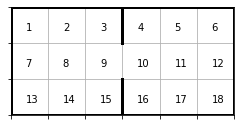

In [6]:
plt.figure(figsize = (4,2))
plt.xlim(0,6)
plt.ylim(0,3)

ax = plt.subplot(1,1,1)
for j in range(6):
    for i in range(3):
        ax.text(j+0.4,i+.65,str(1+6*i+j))
ax.plot((3,3),(2,3),'k',linewidth=3)
ax.plot((3,3),(0,1),'k',linewidth=3)
ax.plot((0,6),(0,0),'k',linewidth=3)
ax.plot((0,6),(3,3),'k',linewidth=3)
ax.plot((0,0),(0,3),'k',linewidth=3)
ax.plot((6,6),(0,3),'k',linewidth=3)

ax.grid()
ax.set_xticklabels(['','','','','',''])
ax.set_yticklabels(['','',''])
ax.invert_yaxis()


# Trainer Params

In [7]:
args.Q_VAR_MULT = .3

args.ALPHA = 0.3

args.OBS_LEAK = 0.005

args.augmentation = True

In [8]:
args.ALPHA, args.OBS_LEAK

(0.3, 0.005)

# Agent Params

In [9]:
args.offPolicy = False

args.GAMMA = 1
args.HIST_HORIZON = 200 * int(1/args.OBS_LEAK)

args.KL_centering = True
args.rtg_centering = True

args.explo_drive = True

In [10]:
args.do_reward = True  
verbose = False
args.monte_carlo = False

In [11]:
mem_Q_var = {}
mem_Q_ref = {}
mem_Q_KL = {}
mem_obs_score = {}
mem_p_eff = {}
mem_KL = {}
mem_total_reward = {}
nb_visits_final = {}
mem_obs_final = {}
V = {}
cpt = {}

## TASK 1 : Uniform exploration

In [12]:
N = 2000

In [13]:
BETA_range = [1] 
args.PREC = 0

mem_obs_final_T1 = []


In [14]:
for turn, BETA in enumerate(BETA_range):
    print('**TURN**', turn)   
 
    agent = Agent(env,
                  ALPHA=args.ALPHA,
                  GAMMA=args.GAMMA, # Episodic agent!
                  BETA=BETA, 
                  PREC=args.PREC,
                  do_reward=args.do_reward,
                  Q_VAR_MULT=args.Q_VAR_MULT) 
    trainer = CCA_OnlineTrainer( agent, 
                            augmentation=args.augmentation,
                            OBS_LEAK=args.OBS_LEAK,
                            ref_prob='unif',
                            KL_centering=args.KL_centering,
                            rtg_centering=args.rtg_centering,
                            monte_carlo=args.monte_carlo,
                            explo_drive=args.explo_drive) 
    
   
    mem_obs_final_T1.append(None)
    
    
    for trial in range(N):
        trainer.run_episode(verbose=verbose)
       
        if trial%1000 == 0:
            print(trial)
        
    mem_obs_final_T1[turn] = trainer.mem_obs_final
    

**TURN** 0
0
1.3555837059961868e-08 1.0922131550563684e-08
6.292620870624298e-05 -0.00021217940453859295


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.0006642222599208549 -0.0009596695737753521
0.033759311645291244 0.007905250695829872
0.05158687227972799 -0.12872748268858633
0.4311957829337498 0.2337741674737264
1.2878084764813038 1.0888036446106453
0.034041390505789054 -0.16067108884796674
1000
0.08864689153028268 -0.1644307945604945
5.005925134731061 4.715277490037465
0.9796709464859444 0.656399983981111
0.2926636774459921 -0.061476789633489515
0.8487390390038737 0.49319591653708655
0.25477244567768026 -0.10086267083975481
2.4881349721235084 2.1247794946946357
0.20469053005415702 -0.17631528639178687


In [15]:
bloc_1 =  np.array(mem_obs_final_T1[0][:250])+1
bloc_2 =  np.array(mem_obs_final_T1[0][1000:2000])+1
nb_visits_1 = []
nb_visits_2 = []
for s in range(18):
    nb_visits_1.append(np.sum(bloc_1 == s+1))
    nb_visits_2.append(np.sum(bloc_2 == s+1))
    

Text(-2.5, 0.13, 'e')

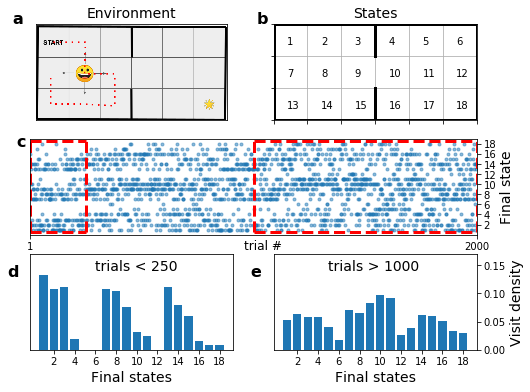

In [16]:
plt.figure(figsize = (8,6))

ax = plt.subplot(3,2,1)
img = mpimg.imread('env-1.png')
ax.imshow(img)
ax.set_title('Environment', fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.text(-50, 0, 'a', fontsize=16, fontweight ="bold")


ax = plt.subplot(3,2,2)

ax.set_xlim(0,6)
ax.set_ylim(0,3)
for j in range(6):
    for i in range(3):
        ax.text(j+0.4,i+.65,str(1+6*i+j))
ax.plot((3,3),(2,3),'k',linewidth=3)
ax.plot((3,3),(0,1),'k',linewidth=3)
ax.plot((0,6),(0,0),'k',linewidth=3)
ax.plot((0,6),(3,3),'k',linewidth=3)
ax.plot((0,0),(0,3),'k',linewidth=3)
ax.plot((6,6),(0,3),'k',linewidth=3)

ax.grid()
ax.set_xticklabels(['','','','','',''])
ax.set_yticklabels(['','',''])
ax.invert_yaxis()
ax.set_title('States', fontsize=14)
ax.text(-0.5, 0, 'b', fontsize=16, fontweight ="bold")



  
ax = plt.subplot(3,1,2)
ax.plot(np.array(mem_obs_final_T1[0])+1, '.', alpha=.5)
ax.set_xlim(0,1250)
ax.set_ylim(0,19)
ax.set_yticks([2,4,6,8,10,12,14,16,18])
ax.set_xticks([1, 2000])
ax.text(960, -3, 'trial #', fontsize=12)    
ax.set_ylabel('Final state', fontsize=14)
ax.plot([1,250],[0.5,0.5],'r--',linewidth=3)
ax.plot([1,250],[18.5,18.5],'r--',linewidth=3)
ax.plot([1,1],[0.5,18.5],'r--',linewidth=3)
ax.plot([250,250],[0.5,18.5],'r--',linewidth=3)
ax.plot([1001,2000],[0.5,0.5],'r--',linewidth=3)
ax.plot([1001,2000],[18.5,18.5],'r--',linewidth=3)
ax.plot([1001,1001],[0.5,18.5],'r--',linewidth=3)
ax.plot([2000,2000],[0.5,18.5],'r--',linewidth=3)
#ax.text(539, 19.5, 'CCA, $\lambda=0$', fontsize=14)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.text(-60, 17.5, 'c', fontsize=16, fontweight ="bold")



ax = plt.subplot(3,2,5)
ax.bar(range(1,19), np.array(nb_visits_1)/250)
ax.set_xticks(range(2,19,2))
ax.set_xlabel('Final states', fontsize=14)
ax.set_ylim([0,0.17]) #yscale('log') #
ax.text(6, 0.14, 'trials < 250', fontsize=14)
ax.set_yticks([])
ax.text(-2.5, 0.13, 'd', fontsize=16, fontweight ="bold")


ax = plt.subplot(3,2,6)
ax.bar(range(1,19), np.array(nb_visits_2)/1000)
ax.set_xticks(range(2,19,2))
ax.set_xlabel('Final states', fontsize=14)
ax.set_ylim([0,0.17]) #yscale('log') #
ax.text(5, 0.14,'trials > 1000', fontsize=14)
ax.set_ylabel('Visit density', fontsize=14)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.text(-2.5, 0.13, 'e', fontsize=16, fontweight ="bold")

#plt.savefig('220520_cca_T1.pdf', bbox_inches='tight')


## TASK 2 : Reward maximization

In [17]:
N = 5000

In [18]:
BETA_REF = 100
BETA_range = [BETA_REF] * 10
args.PREC = 10 / BETA_REF

mem_total_reward_T2 = []
mem_obs_final_T2 = []

In [19]:
args.ALPHA, args.PREC, args.OBS_LEAK

(0.3, 0.1, 0.005)

In [20]:
for turn, BETA in enumerate(BETA_range):
    print('**TURN**', turn)
     
    agent = Agent(env,
                  ALPHA=args.ALPHA,
                  GAMMA=args.GAMMA, # Episodic agent!
                  BETA=BETA, 
                  PREC=args.PREC,
                  do_reward=args.do_reward,
                  Q_VAR_MULT=args.Q_VAR_MULT) 
    trainer = CCA_OnlineTrainer( agent, 
                            augmentation=args.augmentation,
                            OBS_LEAK=args.OBS_LEAK,
                            ref_prob='unif',
                            KL_centering=args.KL_centering,
                            rtg_centering=args.rtg_centering,
                            monte_carlo=args.monte_carlo,
                            explo_drive=args.explo_drive) 
    
    
    mem_total_reward_T2.append(np.zeros(N))
    
    mem_obs_final_T2.append(None)
        
    for trial in range(N):
        trainer.run_episode(verbose=verbose)

        if trial%1000 == 0:
            print(trial)
            
        mem_total_reward_T2[turn][trial] = trainer.total_reward
        
    mem_obs_final_T2[turn] = trainer.mem_obs_final
    

**TURN** 0
0
4.561081458129264e-08 -1.110774165605424e-07
6.410114574308087e-07 -6.9939707639628226e-06
4.891035238654627e-07 -8.287742076003338e-06
1.0602986907029126e-06 -1.3437418492588314e-05
2.369250729969158e-07 -0.0001062754093583777
1000
3.205242319928131e-06 -0.00020055790165149088
4.454833805047286e-06 -0.00025873636948564333
8.233557623951165e-05 -0.0001808524892331279
1.9753714086776706e-06 -0.00034351394732363896
8.997833932979182e-07 -0.00041057475673852636
3.811812793928321e-06 -0.0021517383940985488
1.0045159746320782e-05 -0.002431221506219946
0.1762891252425275 0.17306975641742223
2000
0.001719904207088268 -0.00166151885860071
0.03412556019425909 0.030940692077111486
0.0018976466539523504 0.0009485900710725849
0.013566597169225961 0.012875881389334178
7.377005565100802e-07 -0.00018974961250669368
4.859097327793871e-07 -0.00018990494707153842
3.071567862366561e-08 -0.00019017358874480413
3000
3.185987137481518e-09 -0.00019019700103961587
1.3667918117566448e-11 -0.000190

7.160846897128222e-07 -0.001343414840840392
0.00013117260840766386 -0.0015232453823432594
2.9308036261230703e-06 -0.002758933744648146
2.9149891573954657e-05 -0.0036911929510467607
0.07346172586461691 0.06925629216324877
0.00010050018148912328 -0.004085437018103599
2000
0.02246341222160151 0.018855903680865902
0.026738414742766486 0.023805190613960067
0.01769877139846688 0.014850146056255347
3.911254096383638e-05 -0.0010540650895635149
2.2194271328532956e-08 -0.0010804546534681839
9.567440824817725e-08 -0.0010803747959261215
5.467233565419373e-09 -0.0010804625483632638
3000
2.1849910303028144e-11 -0.0010804674662846716
4.980353852015145e-11 -0.001080467434082063
9.682694904803363e-12 -0.0010804674733786727
2.7489057301374764e-12 -0.001080467480028313
2.0371337443849287e-11 -0.001080467459778237
1.0982480289616407e-12 -0.0010804674782255307
3.4479486368112805e-13 -0.001080467478707636
2.0537906512879487e-14 -0.001080467479000142
1.5799330700727642e-16 -0.0010804674790187005
1.0613999340

#### Q-learning trainer (for comparison)

In [21]:
BETA_range = [1] * 10

mem_total_reward_T2_Q = []
mem_obs_final_T2_Q = []

In [22]:
for turn, BETA in enumerate(BETA_range):
    print('**TURN**', turn)
    
    agent_Q = Agent(env,
                    ALPHA=args.ALPHA,
                    GAMMA=args.GAMMA, # Episodic agent!
                    do_reward=args.do_reward,
                    offPolicy=True) 
    trainer_Q = QL_OnlineTrainer( agent_Q,
                            monte_carlo=args.monte_carlo,
                            rtg_centering=args.rtg_centering) 
    
    mem_total_reward_T2_Q.append(np.zeros(N))
    
    mem_obs_final_T2_Q.append(None)
        
    for trial in range(N):
        trainer_Q.run_episode(verbose=verbose)

        if trial%1000 == 0:
            print(trial)
            
        mem_total_reward_T2_Q[turn][trial] = trainer_Q.total_reward
        
    mem_obs_final_T2_Q[turn] = trainer_Q.mem_obs_final
    

**TURN** 0
0
1000
2000
3000
4000
**TURN** 1
0
1000
2000
3000
4000
**TURN** 2
0
1000
2000
3000
4000
**TURN** 3
0
1000
2000
3000
4000
**TURN** 4
0
1000
2000
3000
4000
**TURN** 5
0
1000
2000
3000
4000
**TURN** 6
0
1000
2000
3000
4000
**TURN** 7
0
1000
2000
3000
4000
**TURN** 8
0
1000
2000
3000
4000
**TURN** 9
0
1000
2000
3000
4000


In [23]:
cumsum_total_reward_T2 = np.cumsum(mem_total_reward_T2, axis=1)
mean_total_reward_T2 = np.mean(cumsum_total_reward_T2, axis=0)
std_total_reward_T2 = np.std(cumsum_total_reward_T2, axis=0)
cumsum_total_reward_T2_Q = np.cumsum(mem_total_reward_T2_Q, axis=1)
mean_total_reward_T2_Q = np.mean(cumsum_total_reward_T2_Q, axis=0)
std_total_reward_T2_Q = np.std(cumsum_total_reward_T2_Q, axis=0)

Text(0.5, 1.0, 'Reward cumsum')

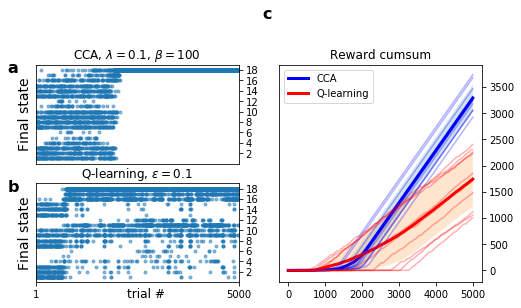

In [24]:
plt.figure(figsize = (8,4))


ax = plt.subplot(2,2,1)
ax.plot(np.array(mem_obs_final_T2[0])+1, '.', alpha=.5)
ax.set_xlim(0,5000)
ax.set_ylim(0,19)
ax.set_yticks([2,4,6,8,10,12,14,16,18])
ax.set_xticks([])
ax.set_ylabel('Final state', fontsize=14)

ax.set_title('States', fontsize=14)
ax.set_title(f'CCA, $\lambda={args.PREC}$, $\\beta=${BETA_REF}')
ax.yaxis.tick_right()
ax.text(-700, 17.5, 'a', fontsize=16, fontweight ="bold")



ax = plt.subplot(2,2,3)
ax.plot(np.array(mem_obs_final_T2_Q[0])+1, '.', alpha=.5)
ax.set_xlim(0,5000)
ax.set_ylim(0,19)
ax.set_yticks([2,4,6,8,10,12,14,16,18])
ax.set_xticks([1, 5000])
ax.text(2250, -3, 'trial #', fontsize=12)    
ax.set_ylabel('Final state', fontsize=14)

ax.set_title('States', fontsize=14)
ax.set_title('Q-learning, $\epsilon=0.1$')
ax.yaxis.tick_right()
ax.text(-700, 17.5, 'b', fontsize=16, fontweight ="bold")



ax = plt.subplot(1,2,2)

ax.plot(mean_total_reward_T2, 'b', linewidth=3, label='CCA')
ax.fill_between(range(5000),
                 mean_total_reward_T2-std_total_reward_T2,
                 mean_total_reward_T2+std_total_reward_T2,
                 alpha=.2)
ax.plot(mean_total_reward_T2_Q,'r', linewidth=3, label='Q-learning')
ax.fill_between(range(5000),
                 mean_total_reward_T2_Q-std_total_reward_T2_Q,
                 mean_total_reward_T2_Q+std_total_reward_T2_Q,
                 alpha=.2)

for turn, BETA in enumerate(BETA_range):
    ax.plot(np.cumsum(mem_total_reward_T2[turn]),'b', alpha=.3)
    
for turn, BETA in enumerate(BETA_range):
    ax.plot(np.cumsum(mem_total_reward_T2_Q[turn]),'r', alpha=.3)
ax.legend()
ax.yaxis.tick_right()
ax.text(-700, 4800, 'c', fontsize=16, fontweight ="bold")

ax.set_title('Reward cumsum')

#plt.savefig('220520_cca_T2.pdf', bbox_inches='tight')